# **Challenge Telecom X - Análisis de Evasión de Clientes**

**Problema:** Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.  
Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

**Datos:** Los datos de la API de Telecom X están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

**Enlace de la API:** https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json

## **📌Extracción**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
url = 'DataBase/TelecomX_Data.json'

In [2]:
# Abrir el archivo json
datos = pd.read_json(url)
datos.head()
# En algunas columnas hay diccionarios que no se habren completamente

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Usamos el modulo json para normalizar el archivo porque hay diccionarios dentro de las columnas
import json

# Cargar los datos desde el archivo JSON
with open('DataBase/TelecomX_Data.json') as f:
    data = json.load(f)

# Normalizar el JSON para aplanar los diccionarios anidados
df = pd.json_normalize(data, sep='.')

# Mostrar las primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **🔧Transformación**

### **Conociendo los datos**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
# Verificando duplicados en los Datos
print("Valores duplicados en el DataFrame: ", df.duplicated().sum())

Valores duplicados en el DataFrame:  0


In [6]:
# Observar los valores unicos de categorias
print("\nValores únicos por categoría (para detectar inconsistencias):")
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Valores únicos por categoría (para detectar inconsistencias):
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


### **Manejo de inconsistencias**

De la informacion sobre que datos unicos hay en cada categoria, podemos observar que en la columna "churn" la cual significa si el cliente dejó o no la empresa, hay 224 filas con espacios en blanco, se puede considerar que estos espacios significan que no ha dejado la empresa, por lo que se podrian cambiar por "No".

In [7]:
# Datos donde hay espacios en blanco en la columna "Churn"
df.loc[df['Churn'] == '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [8]:
# Remplasamos los espacios en blanco por la respuesta "No"
df['Churn'] = df['Churn'].replace('', 'No')
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### **Corrigiendo los tipos de datos**

Remplazamos los valores "Yes" y "No" por 1 y 0 respectivamente para un mejor manejo de los datos en las columnas Churn', 'Partner', 'Dependents', 'PhoneService' y 'PaperlessBilling

In [9]:
binary_cols = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

C:\Users\opino\AppData\Local\Temp\ipykernel_17028\2590068650.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


In [10]:
df[binary_cols] = df[binary_cols].astype(np.int64)

In [11]:
col_categorias = ['customer.gender','phone.MultipleLines','internet.InternetService',
                  'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
                  'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
                  'account.Contract','account.PaymentMethod']
# convertir a tipo category
df[col_categorias] = df[col_categorias].astype('category')

Convertir los valores de la columna "account.Charges.Total" no es posible debido a que hay valores nulos o espacios que reconoce como "string". Pdemos eliminar las filas o dejarlas siempre y cuando no afecte al analisis.  
Por el momento solo eliminaremos el valor, y en caso de haber algun problema mas adelante, seran eleminadas dichas filas

In [12]:
# df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)
nulos = (df['account.Charges.Total'].isna()).sum()
espacios = (df['account.Charges.Total'] == ' ').sum()
sin_valores = (df['account.Charges.Total'] == '').sum()

print('Hay ',nulos, 'valores nulos', '\nHay ',espacios, 'espacios en blanco', '\nHay ',sin_valores,
      'donde no hay valores registrados')


Hay  0 valores nulos 
Hay  11 espacios en blanco 
Hay  0 donde no hay valores registrados


In [13]:
# Eliminar espacios
df['account.Charges.Total'] = df['account.Charges.Total'].str.strip()
# Reemplazar valores vacíos ('') por NaN
df['account.Charges.Total'] = df['account.Charges.Total'].replace('', np.nan)
# Eliminar filas con valores nulos en la columna 'account.Charges.Total'
df = df.dropna(subset=['account.Charges.Total'])
# Convertir a tipo float, forzando conversión segura
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)
# Convertir a tipo float, forzando conversión segura
#df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [14]:
# comprovamos que los datos se cambiaron a float y se eliminaron las 11 filas vacias. Al inicio habia 7267
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   int64   
 2   customer.gender            7256 non-null   category
 3   customer.SeniorCitizen     7256 non-null   int64   
 4   customer.Partner           7256 non-null   int64   
 5   customer.Dependents        7256 non-null   int64   
 6   customer.tenure            7256 non-null   int64   
 7   phone.PhoneService         7256 non-null   int64   
 8   phone.MultipleLines        7256 non-null   category
 9   internet.InternetService   7256 non-null   category
 10  internet.OnlineSecurity    7256 non-null   category
 11  internet.OnlineBackup      7256 non-null   category
 12  internet.DeviceProtection  7256 non-null   category
 13  internet.TechSupport       7256 non-nu

### **Añadir columna cuentas diarias (daily accounts)**

Adaptamos el nombre al formato de los nombres de las columnas de la tabla, que se tienen hasta el momento, pudiendo cambiarlos mas adelante si es necesaria para una mejor visibilidad

In [15]:
# Agregar la columna de cuntas diarias despues de cuentas mesuales
pos = df.columns.get_loc('account.Charges.Monthly') + 1
df.insert(pos, 'account.Charges.daily', df['account.Charges.Monthly'] / 30)

In [16]:
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
5475,7503-ZGUZJ,1,Male,0,0,0,1,1,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,1,Mailed check,84.65,2.821667,84.65
2526,3523-QRQLL,1,Female,0,1,1,22,1,No,DSL,...,No,No,Yes,Yes,One year,1,Bank transfer (automatic),69.50,2.316667,1498.20
502,0708-SJDIS,0,Female,0,0,0,34,1,Yes,DSL,...,No,Yes,Yes,No,Month-to-month,0,Mailed check,65.00,2.166667,2157.50
5573,7619-PLRLP,0,Female,0,1,0,53,1,Yes,DSL,...,Yes,No,No,Yes,One year,0,Bank transfer (automatic),74.10,2.470000,3833.95
6426,8821-KVZKQ,0,Female,0,1,1,70,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),58.40,1.946667,4113.15


In [17]:
# Observamos que el tipo de datos en la columna creada sea float
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   int64   
 2   customer.gender            7256 non-null   category
 3   customer.SeniorCitizen     7256 non-null   int64   
 4   customer.Partner           7256 non-null   int64   
 5   customer.Dependents        7256 non-null   int64   
 6   customer.tenure            7256 non-null   int64   
 7   phone.PhoneService         7256 non-null   int64   
 8   phone.MultipleLines        7256 non-null   category
 9   internet.InternetService   7256 non-null   category
 10  internet.OnlineSecurity    7256 non-null   category
 11  internet.OnlineBackup      7256 non-null   category
 12  internet.DeviceProtection  7256 non-null   category
 13  internet.TechSupport       7256 non-nu

### **Guardando los datos** 

In [18]:
df.to_csv('DataBase/TelecomXData.csv',index=False)

## **📊Carga y análisis**

### **Análisis Descriptivo**

 Análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar, mimimos, maximos y cuartiles. Ayudan a comprender mejor la distribución y el comportamiento de los clientes.

In [19]:
df = pd.read_csv('DataBase/TelecomXData.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,2.186667,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,1.996667,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,2.463333,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,3.266667,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,2.796667,267.40


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   int64  
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   objec

In [21]:
df.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2.158514,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,1.004191,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.608333,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,1.181667,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,2.996667,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333,8684.800000


### **Distribusión de evación**

In [22]:
import matplotlib.pyplot as plt

In [23]:
# Creamos un dataframe con la informacion sobre la permanencia o no de los clientes
evacion = {'Evacion': ('Permanecieron','Baja'),
            'Cantidad': ((df['Churn'] == 0).sum(), (df['Churn'] == 1).sum())}
evacion = pd.DataFrame(evacion)
evacion

,Evacion,Cantidad
0,Permanecieron,5387
1,Baja,1869


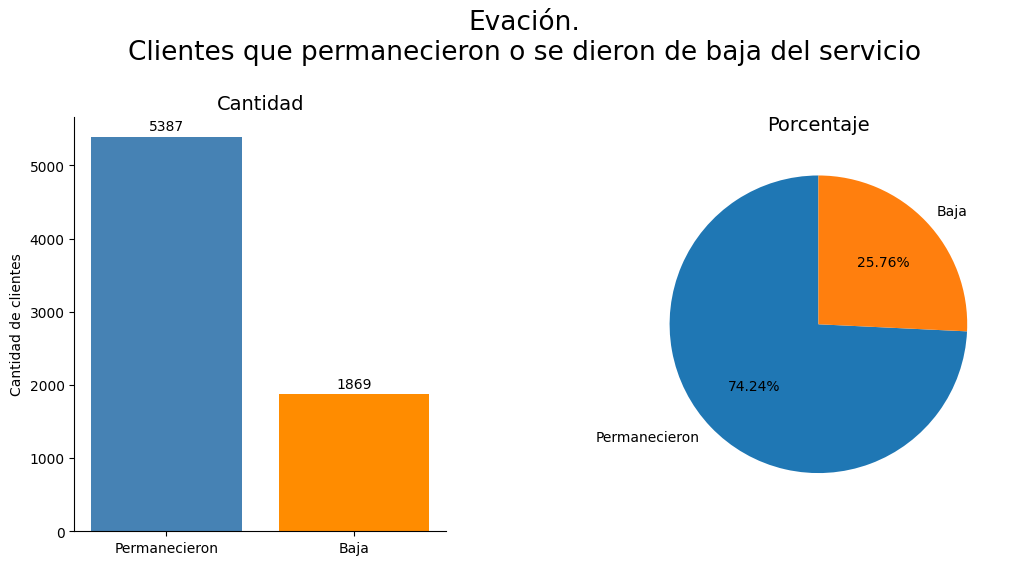

In [24]:
colores = ['steelblue', 'darkorange']
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(hspace=0.5,wspace=0.5,top=0.8)
fig.suptitle('Evación.\nClientes que permanecieron o se dieron de baja del servicio', fontsize=19)

ax[0].bar(evacion['Evacion'],evacion['Cantidad'],color=colores)
ax[0].set_title('Cantidad', fontsize=14)
ax[0].set_ylabel('Cantidad de clientes')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for i, valor in enumerate(evacion['Cantidad']):
    ax[0].text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=10)

ax[1].pie(evacion['Cantidad'], labels=evacion['Evacion'], autopct='%1.2f%%', startangle=90)
ax[1].set_title('Porcentaje', fontsize=14)
plt.show()

### **Recuento de evasión por variables categóricas**

#### **Recuento por genero**

In [25]:
df_group = df.groupby(['Churn', 'customer.gender'], observed=True).size().unstack()
df_group

customer.gender,Female,Male
Churn,,
0,2648,2739
1,939,930


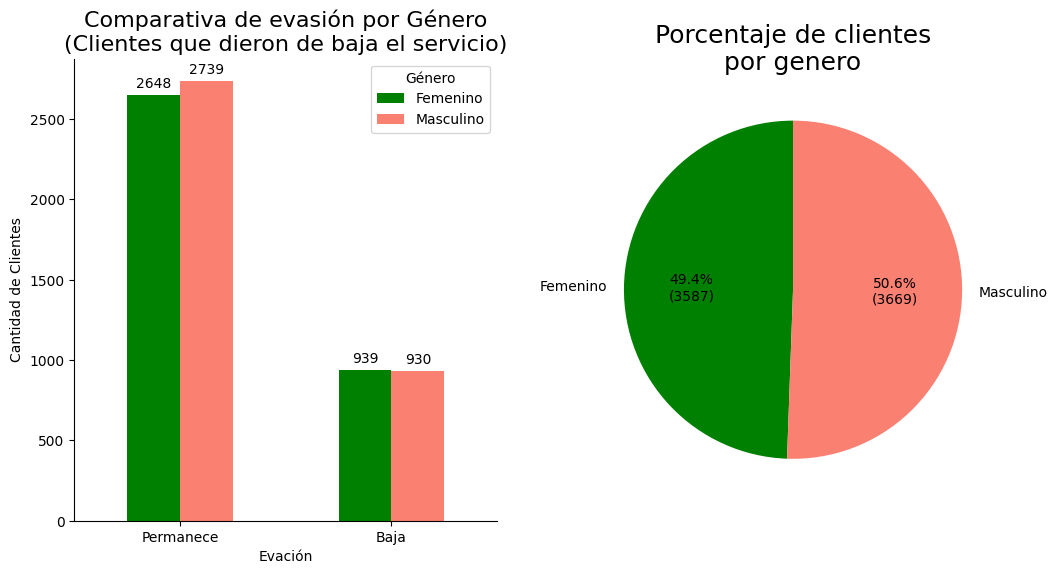

In [26]:
colores=['green', 'salmon']
# Grafica de evación por genero
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
df_group.plot(kind='bar',ax=ax[0],color=colores)
ax[0].set_title('Comparativa de evasión por Género\n(Clientes que dieron de baja el servicio)',fontsize=16)
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].set_xlabel('Evación')
ax[0].legend(title='Género',labels=('Femenino','Masculino'))
ax[0].set_xticklabels(['Permanece', 'Baja'], rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3)

# Datos para grafica de porcentaje por cada genero
cantidades = [df_group['Female'].sum(), df_group['Male'].sum()]
etiquetas = ['Femenino', 'Masculino']
# ➕ Función para mostrar porcentaje + cantidad
def etiqueta_pastel(pct, all_vals):
    cantidad = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({cantidad})'
ax[1].pie(cantidades, labels=etiquetas, autopct=lambda pct: etiqueta_pastel(pct, cantidades),
          startangle=90,colors=colores)
ax[1].set_title('Porcentaje de clientes\npor genero', fontsize=18)
plt.show()

#### **Recuento por tipo de contrato**

In [27]:
group_contract = df.groupby(['Churn', 'account.Contract'],observed=True).size().unstack()
group_contract


account.Contract,Month-to-month,One year,Two year
Churn,,,
0,2350,1352,1685
1,1655,166,48


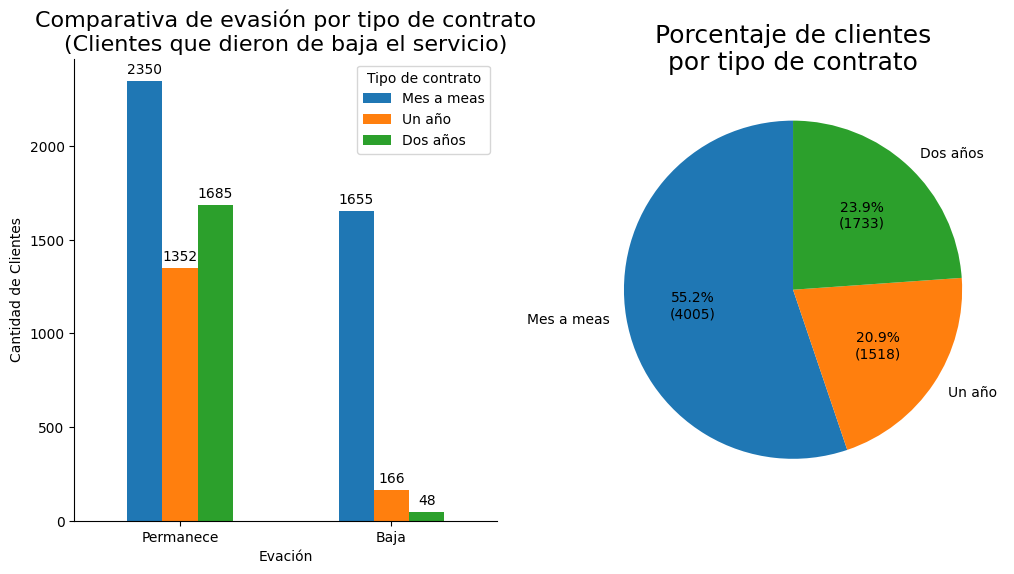

In [28]:
# Grafica de evación por tipo de contrato
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
group_contract.plot(kind='bar',ax=ax[0])
ax[0].set_title('Comparativa de evasión por tipo de contrato\n(Clientes que dieron de baja el servicio)',
                fontsize=16)
ax[0].set_xlabel('Evación')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Tipo de contrato',labels=('Mes a meas','Un año','Dos años'))
ax[0].set_xticklabels(['Permanece', 'Baja'], rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3)

# Datos para grafica de porcentaje por cada tipo de contrato
cantidades = [group_contract['Month-to-month'].sum(), group_contract['One year'].sum(),
              group_contract['Two year'].sum()]
etiquetas = ['Mes a meas','Un año','Dos años']
# Función para mostrar porcentaje + cantidad
def etiqueta_pastel(pct, all_vals):
    cantidad = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({cantidad})'
ax[1].pie(cantidades, labels=etiquetas, autopct=lambda pct: etiqueta_pastel(pct, cantidades),
          startangle=90)
ax[1].set_title('Porcentaje de clientes\npor tipo de contrato', fontsize=18)
plt.show()

#### **Recuento por método de pago**

In [29]:
group_pay = df.groupby(['Churn', 'account.PaymentMethod'],observed=True).size().unstack()
group_pay

account.PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
0,1329,1335,1374,1349
1,258,232,1071,308


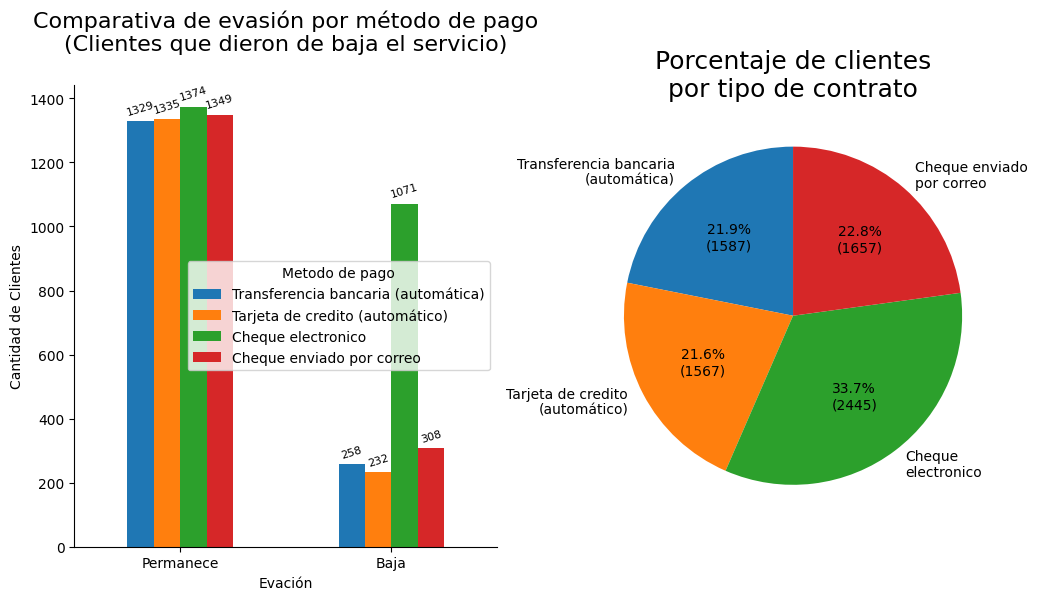

In [30]:
# Grafica de evación por método de pago
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
group_pay.plot(kind='bar',ax=ax[0])
ax[0].set_title('Comparativa de evasión por método de pago\n(Clientes que dieron de baja el servicio)',
                fontsize=16,pad=25)
ax[0].set_xlabel('Evación')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Metodo de pago',labels=('Transferencia bancaria (automática)',
                                            'Tarjeta de credito (automático)','Cheque electronico',
                                            'Cheque enviado por correo'))
ax[0].set_xticklabels(['Permanece', 'Baja'], rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3,fontsize=8,rotation=17)

# Datos para grafica de porcentaje por cada método de pago
cantidades = [group_pay['Bank transfer (automatic)'].sum(), group_pay['Credit card (automatic)'].sum(),
              group_pay['Electronic check'].sum(),group_pay['Mailed check'].sum()]
etiquetas = ['Transferencia bancaria\n(automática)','Tarjeta de credito\n(automático)','Cheque\nelectronico',
                                            'Cheque enviado\npor correo']
# Función para mostrar porcentaje + cantidad
def etiqueta_pastel(pct, all_vals):
    cantidad = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({cantidad})'
ax[1].pie(cantidades, labels=etiquetas, autopct=lambda pct: etiqueta_pastel(pct, cantidades),
          startangle=90)
ax[1].set_title('Porcentaje de clientes\npor tipo de contrato', fontsize=18)
plt.show()

#### **Recuento por servicio de internet**

In [31]:
group_internet_service = df.groupby(['Churn', 'internet.InternetService'],observed=True).size().unstack()
group_internet_service

internet.InternetService,DSL,Fiber optic,No
Churn,,,
0,2024,1901,1462
1,459,1297,113


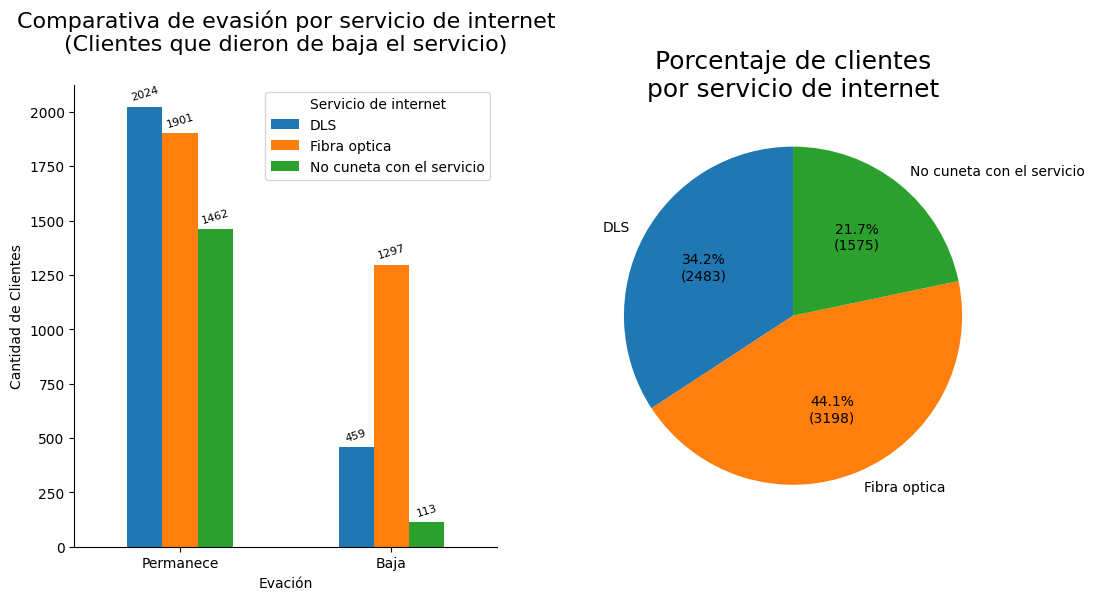

In [32]:
# Grafica de evación por servicio de internet
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
group_internet_service.plot(kind='bar',ax=ax[0])
ax[0].set_title('Comparativa de evasión por servicio de internet\n(Clientes que dieron de baja el servicio)',
                fontsize=16,pad=25)
ax[0].set_xlabel('Evación')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Servicio de internet',labels=('DLS','Fibra optica','No cuneta con el servicio'))
ax[0].set_xticklabels(['Permanece', 'Baja'], rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=3,fontsize=8,rotation=17)

# Datos para grafica de porcentaje por cada método de pago
cantidades = [group_internet_service['DSL'].sum(),group_internet_service['Fiber optic'].sum(),
              group_internet_service['No'].sum()]
etiquetas = ['DLS','Fibra optica','No cuneta con el servicio']
# Función para mostrar porcentaje + cantidad
def etiqueta_pastel(pct, all_vals):
    cantidad = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({cantidad})'
ax[1].pie(cantidades, labels=etiquetas, autopct=lambda pct: etiqueta_pastel(pct, cantidades),
          startangle=90)
ax[1].set_title('Porcentaje de clientes\npor servicio de internet', fontsize=18)
plt.show()

### **Conteo de evasión por variables numéricas**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#### **Total gastado**

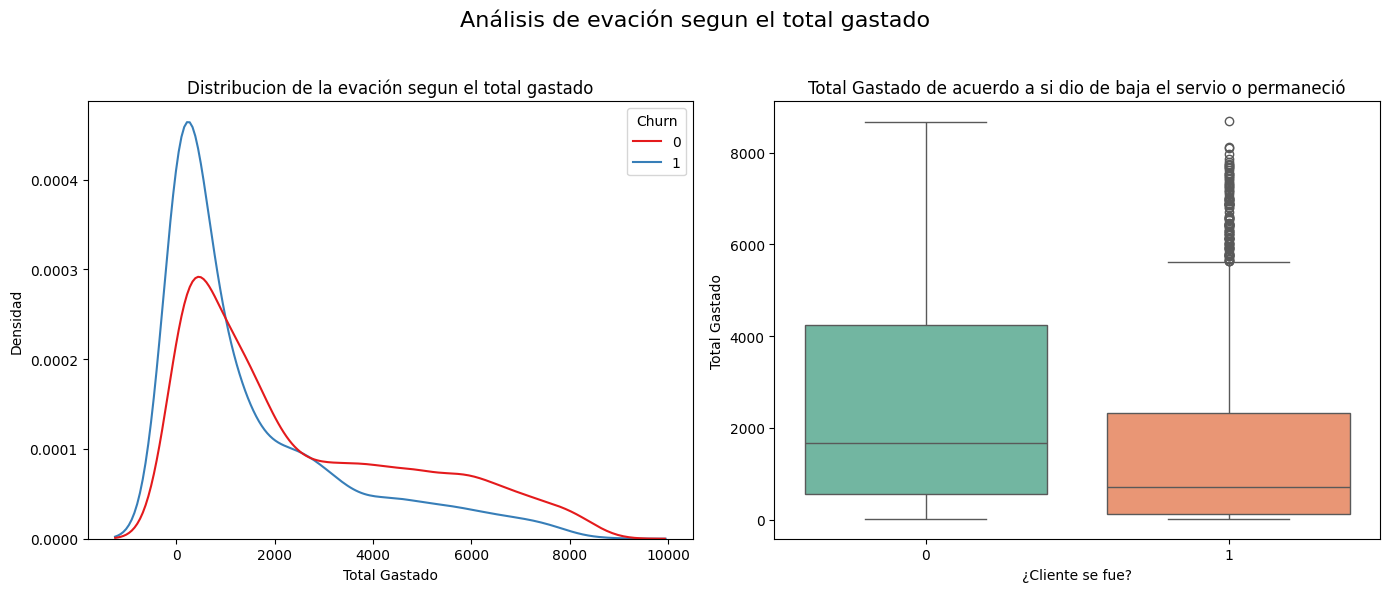

In [34]:
# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Análisis de evación segun el total gastado', fontsize=16)

# Gráfico de densidad
sns.kdeplot(
    data=df,
    x='account.Charges.Total',
    hue='Churn',
    palette='Set1',
    common_norm=False,
    fill=False,
    ax=axes[0]
)
axes[0].set_title('Distribucion de la evación segun el total gastado')
axes[0].set_xlabel('Total Gastado')
axes[0].set_ylabel('Densidad')

# Boxplot
sns.boxplot(
    x='Churn',
    y='account.Charges.Total',
    hue='Churn',
    data=df,
    palette='Set2',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Total Gastado de acuerdo a si dio de baja el servio o permaneció')
axes[1].set_xlabel('¿Cliente se fue?')
axes[1].set_ylabel('Total Gastado')

# Mostrar ambos gráficos juntos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar layout para dejar espacio al título principal
plt.show()

#### **Cuenta Mensual**

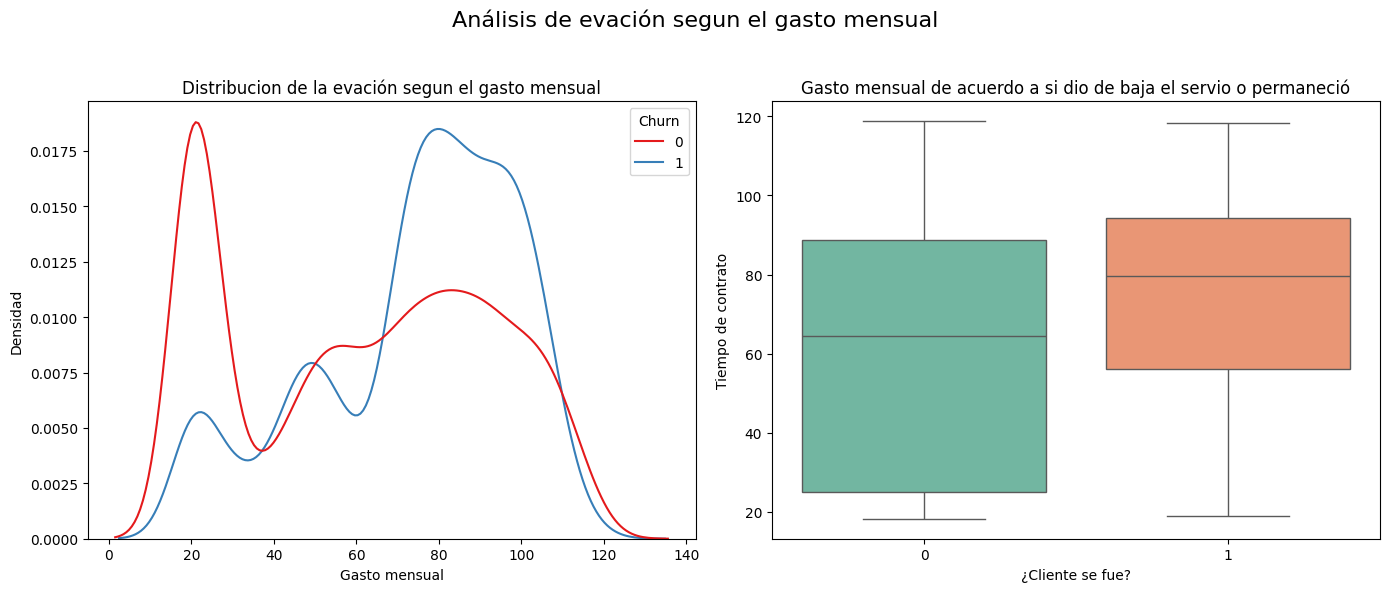

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Análisis de evación segun el gasto mensual', fontsize=16)

# Gráfico de densidad
sns.kdeplot(
    data=df,
    x='account.Charges.Monthly',
    hue='Churn',
    palette='Set1',
    common_norm=False,
    fill=False,
    ax=axes[0]
)
axes[0].set_title('Distribucion de la evación segun el gasto mensual')
axes[0].set_xlabel('Gasto mensual')
axes[0].set_ylabel('Densidad')

# Boxplot
sns.boxplot(
    x='Churn',
    y='account.Charges.Monthly',
    hue='Churn',
    data=df,
    palette='Set2',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Gasto mensual de acuerdo a si dio de baja el servio o permaneció')
axes[1].set_xlabel('¿Cliente se fue?')
axes[1].set_ylabel('Tiempo de contrato')

# Mostrar ambos gráficos juntos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Cuenta diaria**

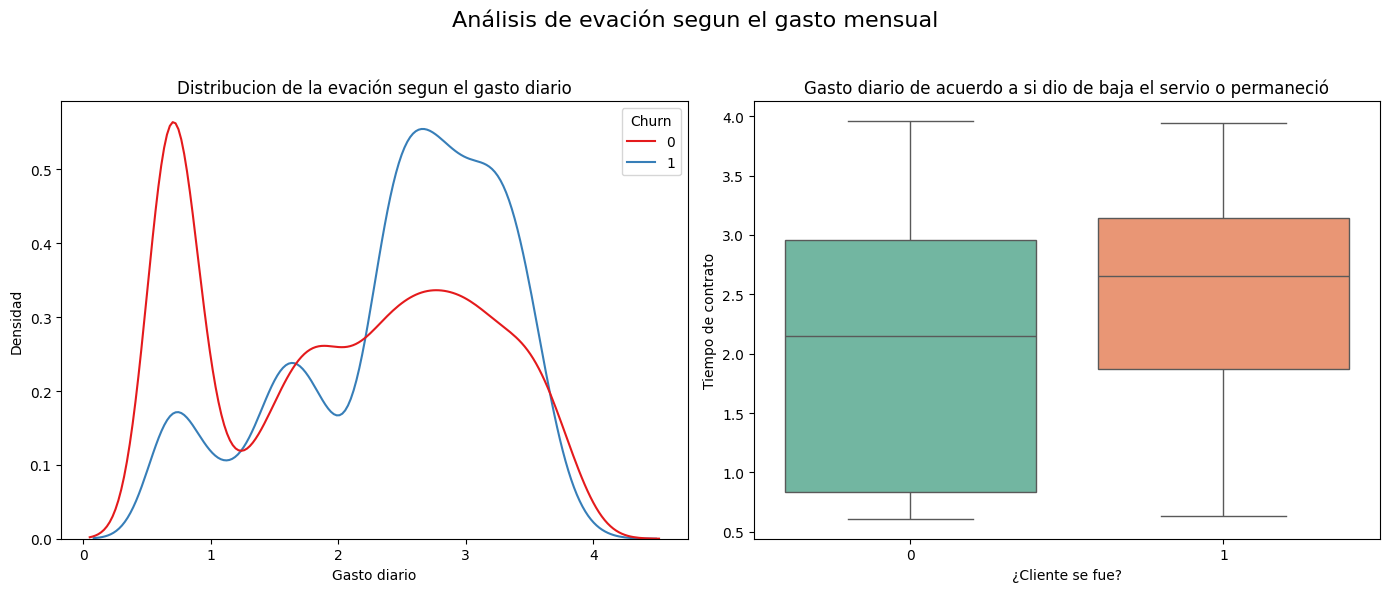

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Análisis de evación segun el gasto mensual', fontsize=16)

# Gráfico de densidad
sns.kdeplot(
    data=df,
    x='account.Charges.daily',
    hue='Churn',
    palette='Set1',
    common_norm=False,
    fill=False,
    ax=axes[0]
)
axes[0].set_title('Distribucion de la evación segun el gasto diario')
axes[0].set_xlabel('Gasto diario')
axes[0].set_ylabel('Densidad')

# Boxplot
sns.boxplot(
    x='Churn',
    y='account.Charges.daily',
    hue='Churn',
    data=df,
    palette='Set2',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Gasto diario de acuerdo a si dio de baja el servio o permaneció')
axes[1].set_xlabel('¿Cliente se fue?')
axes[1].set_ylabel('Tiempo de contrato')

# Mostrar ambos gráficos juntos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Tiempo de contrato**

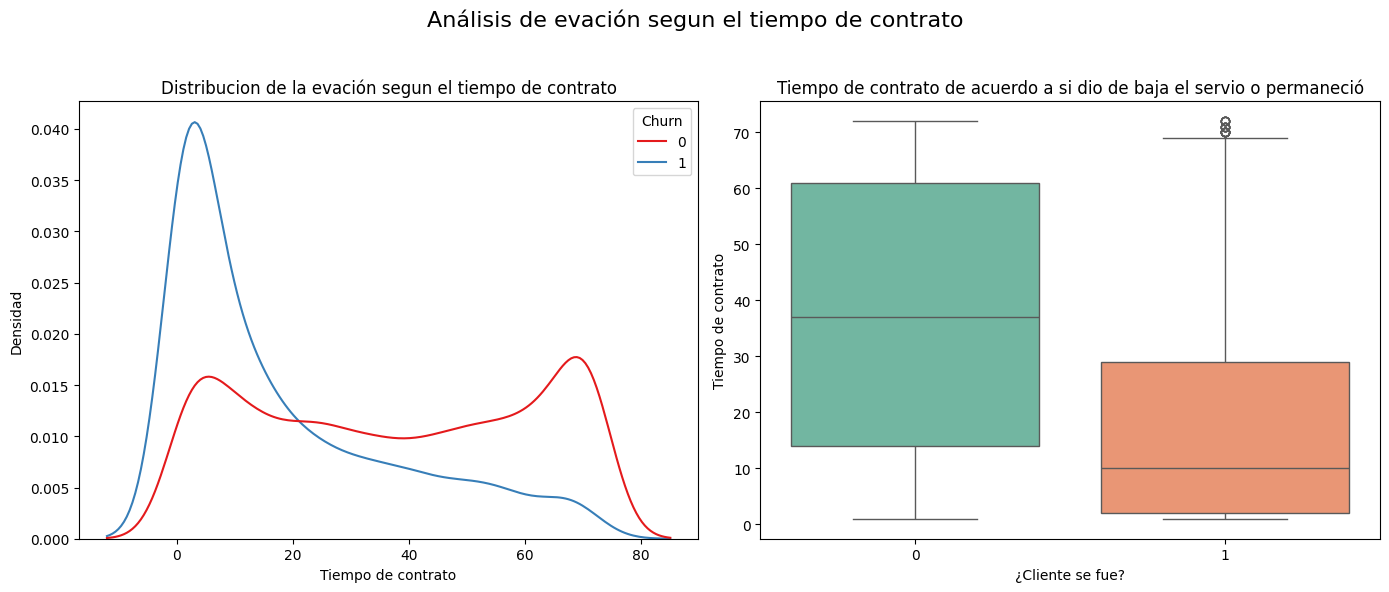

In [37]:
# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Análisis de evación segun el tiempo de contrato', fontsize=16)

# Gráfico de densidad
sns.kdeplot(
    data=df,
    x='customer.tenure',
    hue='Churn',
    palette='Set1',
    common_norm=False,
    fill=False,
    ax=axes[0]
)
axes[0].set_title('Distribucion de la evación segun el tiempo de contrato')
axes[0].set_xlabel('Tiempo de contrato')
axes[0].set_ylabel('Densidad')

# Boxplot
sns.boxplot(
    x='Churn',
    y='customer.tenure',
    hue='Churn',
    data=df,
    palette='Set2',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Tiempo de contrato de acuerdo a si dio de baja el servio o permaneció')
axes[1].set_xlabel('¿Cliente se fue?')
axes[1].set_ylabel('Tiempo de contrato')

# Mostrar ambos gráficos juntos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar layout para dejar espacio al título principal
plt.show()

## **📄Informe final**

### **Introducción**

Telecom X se encuentra actualmente enfrentando una problemática crítica: una elevada tasa de cancelación de servicios por parte de sus clientes, fenómeno conocido como "churn". Ante esta situación, la empresa ha lanzado este proyecto de analisis de la información obtenida, cuyo objetivo es identificar y comprender los factores que influyen en la pérdida de usuarios, con el fin de tomar decisiones informadas y diseñar estrategias efectivas para mejorar la retención.  
El desafío de este proyecto es recopilar, procesar y analizar la información disponible. El objetivo de este análisis exploratorio es extraer información valiosa que permita detectar patrones de comportamiento, correlaciones relevantes y posibles causas de la evación de clientes "churn". Estos hallazgos servirán como base para el desarrollo de modelos predictivos y acciones estratégicas que contribuyan a reducir la tasa de evasión de clientes.  
Para llevar a cabo este análisis, se utilizaron los datos proporcionados por la API de Telecom X, disponibles en formato JSON. Este conjunto de datos incluye información esencial sobre cada cliente, como características demográficas, tipo de servicios contratados (telefonía, internet, líneas múltiples), uso de servicios adicionales (seguridad, respaldo, atención técnica, entre otros), así como su estado actual de permanencia o cancelación del servicio.  
Enlace de la API de datos:
https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json

### **Limpieza y Tratamiento de Datos**

Importar los datos:  
Se realizó la importación de los datos que se tienen de los clientes desde la API de TelecomX. Los datos están en formato JSON, el cual es un archivo ligero para la gran cantidad de datos que se tienen.  
Una vez obtenidos se normalizaron, debido a los diferentes niveles en los que se guardo la informacion, con lo cual es más fácil de observar. ademas se guardan en un DataFrame, para un mejor manejo en Python.  
  
Limpieza y procesamiento de datos:  
Una vez que se tiene la informacion estructurada, se busca que no haya inconsistencias en los datos, por lo cual se busca que no haya datos duplicados, vacíos o con errores en la información que pueda afectar al resultado del análisis. Se eliminan datos duplicados y vacíos. En la columna de evasión (Churn) se decide que los datos vacíos son considerados como que los clientes permanecieron, por lo que se transforman en la opción de “NO” (permanecieron).   
Las columnas binarias (donde solo hay opciones) se transformación en 0 ó 1, ya que es una forma más fácil de manejar estos datos. Estas colimas son: evasión, pareja, personas dependientes, servicio telefónico y factura en línea.  
Despues, se transforman los datos en los tipos correctos de la informacion, ya sean numéricas, categóricas o texto.  
Por último, se añade la columna cuentas diarias, a partir de la facturación mensual.

### **Análisis Exploratorio de Datos**

#### **Distribución de cancelación (Evación)**

Se observa una gran cantidad de cancelaciones, lo que justifica un analisis profundo, para determinar las posibles causas, buscar como atenderlas y así evitar una mayor cancelación e incluso revertir el problema.

![Distribución de evacion (Churn)](Images/Churn.png)

#### **Recuento por genero**

Se puede apreciar que no hay una gran diferencia entre la cantidad de hombe o mujeres que contratan el servicio, siendo la cantidad de hombres que contrataron el servicio, ligeramente superior.  
Por otra parte en cuanto a cancelación, aunque las mujeres cancelan ligeramente mas, apesar de la ligera, menor cantidad de clientes mujeres, esto no puede ser conciderado un factor para la cancelación.  
Se concluye que el genero no influye en la cancelación o permanencia en el servicio.  

![Grafica de cancelación con respecto al genero](Images/Churn_by_Gender.png)

#### **Recuento por tipo de contrato**

Podemos observar que la mayoria de clientes tiene un contrato de mes a mes y el tipo de contrato menos elegido es de un año. Sin embargo, tambien se puede ver que los clientes con contrato de mes a mes, son los que mas cancelan su suscripción al servicio, mientras que los que contratan a dos años son los que tienen una menor tasa de avandono del servicio.

![Grafica de cancelación por tipo de contrato](Images/Churn_by_Contract.png)

#### Recuento por metodo de pago

Se observa que el metodo de pago de major elección es el cheque electronico, mientras que los demás metodos de pago, tienen mas o menos la misma proporción. Sin embargo este metodo de pago tambien estapresente en una proporcion mayor, entre los clientes que cancelan el servicio.  
Por otro lado, el metodo de pago entre los clientes con menor cancelación de servicio es el pago automático por tarjeta de credito, seguido del pago automático por transferencia bancaria.

![Grafica de cancelación segun el metodo de pago](Images/Churn_by_PaymentMethod.png)

#### **Recuento por servicio de internet**

En esta parte podemos ver que los clientes que tienen el servicio de internent de fibra optica, son mas propensos a abandonar el servicio, comparados con los que cuentn con el servicio DLS, ademas de que hay un 21.7% de clientes que no tienen servicio de internet, por lo cual se podria venderles este servicio a estos clientes potenciales, que ya tienen alguno de los servicios de la compañia, con lo cual se les hara mas facil agregar este servicio.

![Grafica de cancelación segun el servicio de internet](Images/Churn_by_InternetService.png)

#### **Recuento por total gastado**

Por otra parte podemos ver que la mayoria de los clientes que cancelaron el servicio, tienden a tener gastos totales mas pequeños, en comparación a loc que permanecieron, los cuales tiene una mejor distribución en cuanto a gastos.  
La mayoria de los clientes que cancelan (casi un 75%), tienden a tener gastos menores a 2000, y casos atipicos mayores a 6000. En cambio los clientes que permanencen solo cerca del 50% tienden a gatos menores a 2000 y una distribucion mas igualitaria entre 2000 y 4000, de ahi siguiendo una distribucion a la baja pero constante.

In [38]:
df.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2.158514,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,1.004191,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.608333,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,1.181667,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,2.996667,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333,8684.800000


![Grafica de cancelacion de acuerdo al total gastado](Images/Churn_by_TotalCharge.png)

#### **Recuento por gasto mensual y diario**

En cuanto al gasto mensual y diario estan corelacionados, ya que el gasto diario es dependiente del mensual.  
Analisando los gastos de los clientes, podemos observar que los clientes que abandonan el servicio, por lo general tienden a tener masyores gastos mensuales, lo que se traduce en mayores gastos diarios que afectan a su economía, con lo cual, largo plazo cancelan el servicio.  
Comparando con los resultados en las grafica anterior de gasto total, podemos darnos cuenta que, como cancelan al poco tiempo, aun cuando el gasto mensual/diario es mayor, a mediano y largo plazo el total invertido en los servicios de la empresa es menor.

![Grafica de cancelacion con respecto al gasto mensual](Images/Churn_by_MonthlyCharge.png)

![Grafica de cancelacion con respecto al gasto mensual](Images/Churn_by_DailyCharge.png)

#### **Recuento por tiempo de contrato**

La gran mayori de clientes no tardan en cancelar el servicio, como podemos ver en la grafica, la cual muestra un gran pico en los primeros 10 meses para los clientes que abandonan el servicio, lo caul es al rededor del 50% de clientes que abandonan por esta cantidad de tiempo.  
Por otro lado, los clientes que permaneces, tienden a tener una distribución mas equilibrada, si bien se tiene un pico al inicio, como los que dejan, tambien tenemos un pico mayor al final de la grafica, alrededor de 70 meses, los cuales ya son clientes que se sienten satisfechos con el servicio actal y es muy probable que continuen mas tiempo.

![Grafica de cancelacion con respecto al tiempo de contrato](Images/Churn_by_Tenure.png)

### **Conclusiones e Insights**

Analizando las graficas a partir de los datos, podemos concluir que la principal causa de cancelación del servicio es el alto gasto mensual/diario de los usuarios, debido al costo mas elevado de la fibra optica, en comparación al DSL. Tambien se puede ver que, a pesar de que los clientes que se quedan tienden a tener menores gastos en los servicios de TelecomX, su fidelidad a lo largo de los años ha dado mayores ganancias a la compañia, esto visto en que los clientes que permanecen tienden a tener un mayor gasto total.  
Ademas, se debe notar que los clientes que pagan con cheques electronicos, tienden a abandonar mas, que los que tienen pagos automaticos, como lo es en una tarjeta de credito o transferencia bancaria. Puede deberse a que al ver el gasto, al realizar el pago, tienden a verlo como un pago alto, siedo mas propensos a dar de baja el servicio, que los clientes que tienen el cobro automatico, pues estos no ven el cobro, por lo cual no es uno de sus principales gastos a recortar.  
Otro factor a conciderar es el del tipo de contratos, ya que los que pagan mes a mes tienden a abandonar mas facilmente, que los que tienen un contrato a dos años, con lo cual es evidente que resulta mas Beneficioso tener un contarto a largo palzo, incluso a un año, ya que tambien tiene un menor porcentaje de cancelacion.

### **Recomendaciones**

A partir de las conclusiones obtenidas mediante el análisis de los datos, podemos llegar a las siguientes recomendaciones para mejorar la retención de clientes e incrementar los beneficios para la empresa:  
- Convencer a los clientes de que realicen el pago de forma automatica, ya sea por medio del cobro de tarjeta de credito o transferencia bancaria
- Iniciar a los clientes en el servico de internet mediante el tipo DSL, y despues que migren a fibra optica si lo concideran necesario.
- Los clientes con el servicio de fibra optica que considren abandonar, se les convensa de dar la oportunidad de probar con el servicio DSL, explicandoles el beneficio de un menor coste, ademas de poder darles alguna promoción, como lo seria un mes gratis o un descuento inicial en el servicio DSL.
- Convencer a los clientes en obtener un contrato a largo plazo, preferentemente a dos años, o en su defecto a un año. Pudiendo dar algun beneficio al cliente, como lo seria un menor coste por mes, al realiar le contrato, comparado con el costo de mes a mes.
- Ademas, para incrementar los ingresos de la empresa, se tiene un 21.7% de clientes que no cuentan con servicio telefonico, siendo un potencial de clientes para este servicio. Se les podria ofrecer este servicio dando alguna promoicion o descuento, ademas de que los clientes que cuentan con DSL, les es más varato el instalar el servicio telefonico.